# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
count    129780.000000
mean        376.585253
std          67.

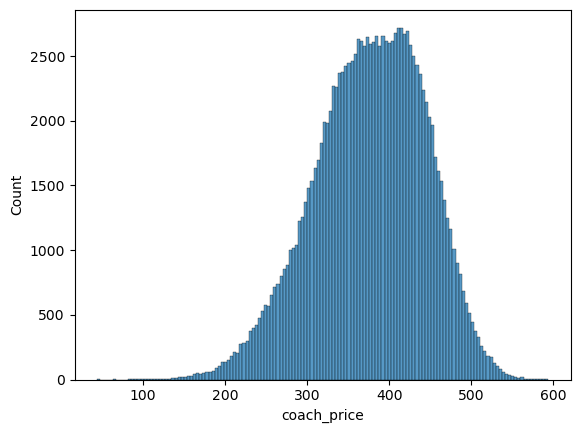

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
print(flight.coach_price.describe())

sns.histplot(flight.coach_price)
plt.show()
plt.clf()

#Based on the plot $500 for coach is not a good price as it is above average.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

     miles  passengers  delay inflight_meal inflight_entertainment  \
75    4182         209      0           Yes                    Yes   
81    4158         213      0            No                    Yes   
111   4269         217      0            No                     No   
290   4239         221      0            No                    Yes   
295   4131         230      0            No                     No   

    inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
75            Yes   Wednesday     No      No      416.320           1441.36   
81            Yes    Saturday     No     Yes      474.350           1712.92   
111           Yes      Sunday     No     Yes      407.125           1614.34   
290           Yes    Saturday     No     Yes      432.905           1678.51   
295           Yes      Friday     No     Yes      406.565           1591.73   

     hours  
75       8  
81       8  
111      8  
290      8  
295      8  
count    2634.000000
mean 

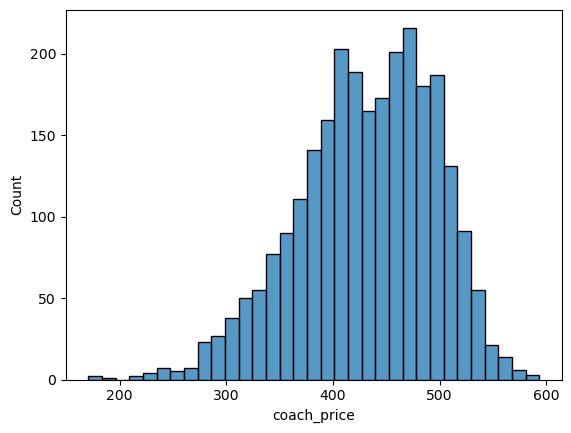

<Figure size 640x480 with 0 Axes>

In [5]:
## Task 2
eight_hr_flights = flight[flight.hours == 8]
print(eight_hr_flights.head())

print(eight_hr_flights.coach_price.describe())


sns.histplot(eight_hr_flights.coach_price)
plt.show()
plt.clf()

#most of the flights are between $400 to $500 so $500 is not bad but you can probably still get a better value

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

       miles  passengers  delay inflight_meal inflight_entertainment  \
10100   1865         207      9           Yes                     No   
10101   2316         211     12           Yes                    Yes   
10102    710         214      5            No                     No   
10103   2374         217      9            No                     No   
10104   2628         208     13            No                    Yes   

      inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
10100           Yes    Saturday     No     Yes      349.555           1440.21   
10101           Yes      Monday     No      No      330.430           1291.73   
10102           Yes      Friday     No     Yes      248.590           1413.28   
10103           Yes     Tuesday     No      No      282.550           1212.98   
10104           Yes      Friday     No     Yes      467.770           1655.24   

       hours  
10100      3  
10101      4  
10102      1  
10103      4  
10104

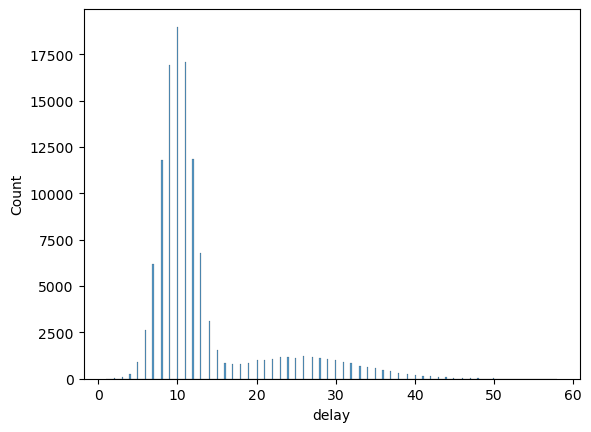

        miles  passengers  delay inflight_meal inflight_entertainment  \
129680   2722         198   1515            No                    Yes   
129681   1500         215   1484           Yes                     No   
129682   2236         189   1498            No                    Yes   
129683   2105         222   1519            No                    Yes   
129684    933         205   1446           Yes                    Yes   

       inflight_wifi day_of_week redeye weekend  coach_price  \
129680           Yes   Wednesday     No      No      286.300   
129681           Yes      Monday     No      No      254.520   
129682           Yes   Wednesday     No      No      395.230   
129683           Yes      Sunday     No     Yes      468.945   
129684           Yes     Tuesday     No      No      298.955   

        firstclass_price  hours  
129680           1374.06      5  
129681           1240.24      3  
129682           1280.46      4  
129683           1567.65      4  
129684

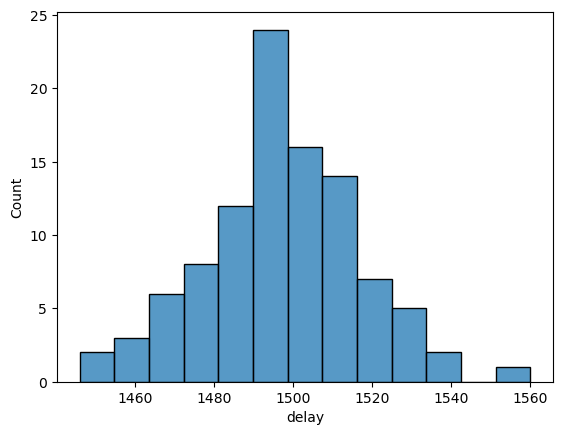

<Figure size 640x480 with 0 Axes>

In [7]:
## Task 3
#sns.histplot(flight.delay)
#plt.show()
#plt.clf()

#print(flight.delay.unique())

#Based on the unique values and histogram, there seems to be a lot of outliers. Going to focus on data less than a 100 minutes.
delay_subset = flight[(flight.delay < 100) & (flight.delay > 0)]
print(delay_subset.head())
sns.histplot(delay_subset.delay)
plt.show()
plt.clf()

#Delays of 10 minutes are the most common (mode).
#Want to take a look at outliers
delay_subset_large = flight[(flight.delay >= 1000)]
print(delay_subset_large.head())
sns.histplot(delay_subset_large.delay)
plt.show()
plt.clf()

# There are about couple hundred flight delayed by more than 1000 minutes(16+ hours)

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

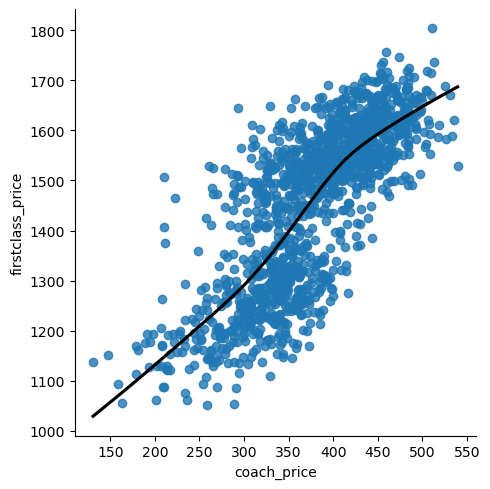

<Figure size 640x480 with 0 Axes>

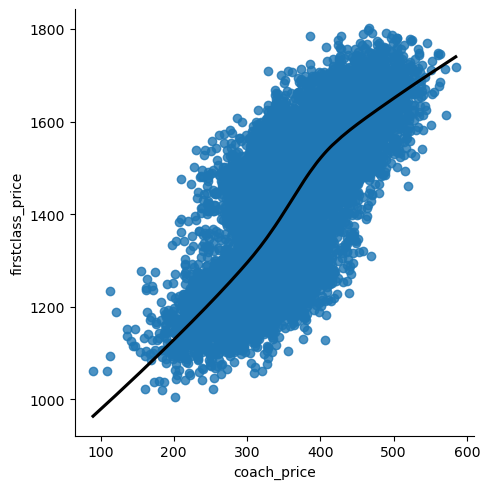

<Figure size 640x480 with 0 Axes>

In [17]:
## Task 4
#sns.scatterplot(x=flight.coach_price,y=flight.firstclass_price)
perc = 0.01
flight_sample = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sample, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

perc = 0.1
flight_sample2 = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sample2, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()
#There is a strong positive correlation. higher the coach prices, higher the firstclass prices

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

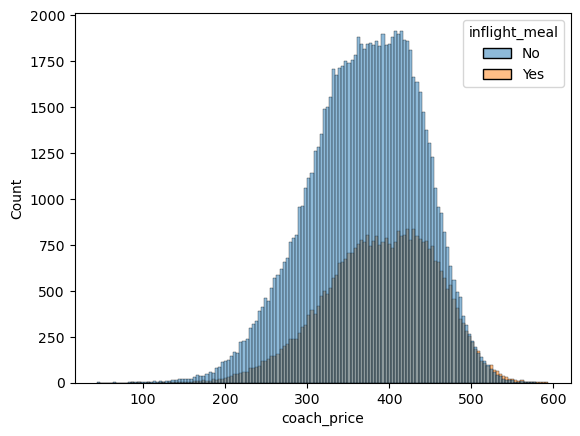

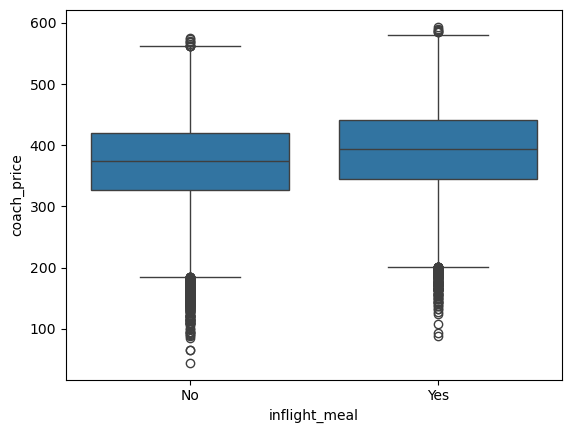

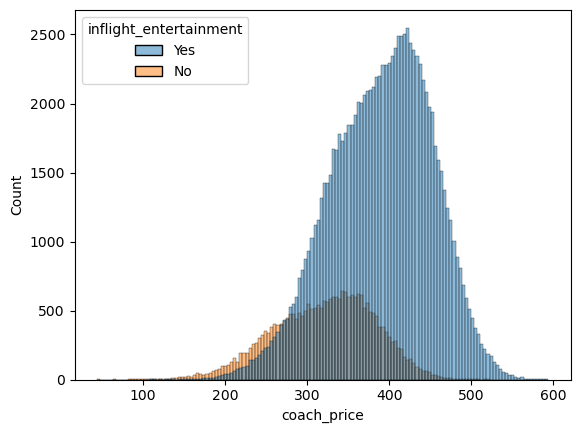

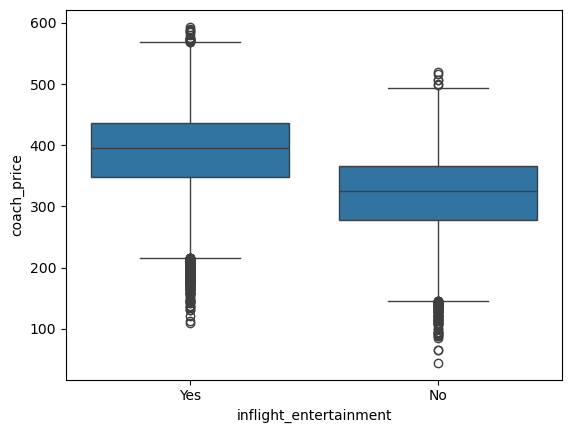

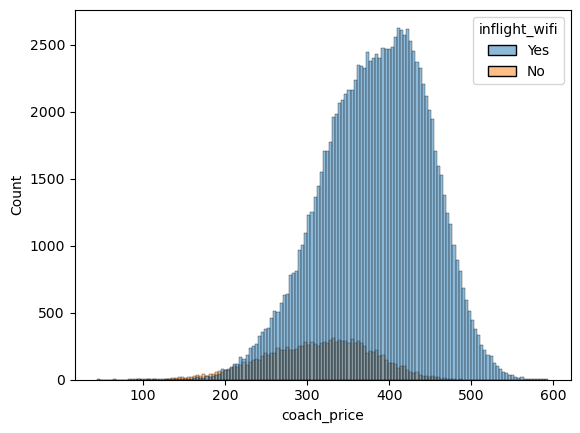

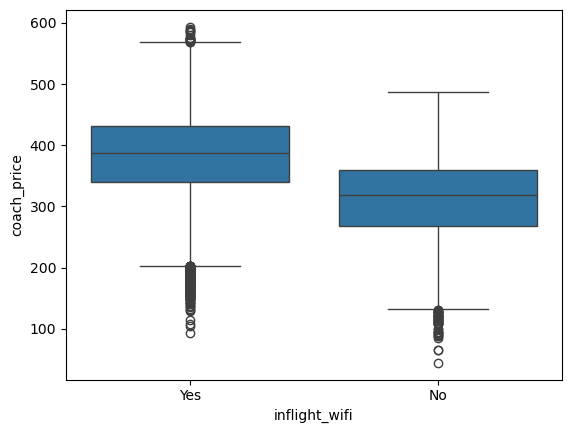

<Figure size 640x480 with 0 Axes>

In [35]:
## Task 5
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()
sns.boxplot(x = flight.inflight_meal, y = flight.coach_price, data = flight)
plt.show()
plt.clf()
#no correlation as there is lot of overlap 


sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()
sns.boxplot(x = flight.inflight_entertainment, y = flight.coach_price, data = flight)
plt.show()
plt.clf()
#entertainment does increase prices in most flights

#even though there is some overlap, the 
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()
sns.boxplot(x = flight.inflight_wifi, y = flight.coach_price, data = flight)
plt.show()
plt.clf()
#wifi does increase prices in most flights

6. How does the number of passengers change in relation to the length of flights?

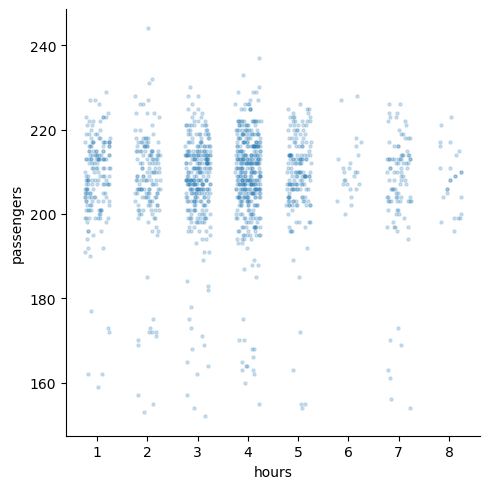

<Figure size 640x480 with 0 Axes>

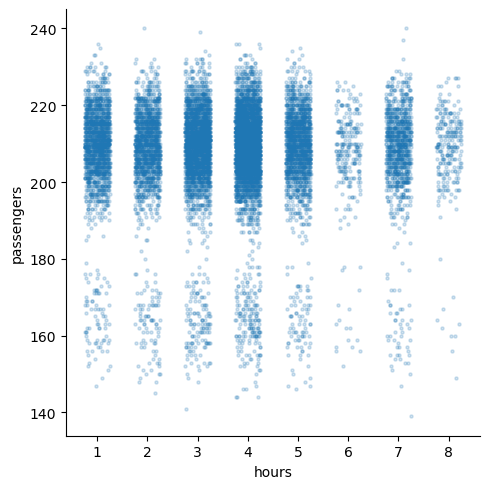

<Figure size 640x480 with 0 Axes>

In [51]:
## Task 6

#sns.scatterplot(x= flight.hours, y=flight.passengers, s=5)
#plt.show()
#plt.clf()
#There is no correlation with number of passengers and length of flight

sns.lmplot(x = "hours", y = "passengers", data = flight_sample, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

sns.lmplot(x = "hours", y = "passengers", data = flight_sample2, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

#Wierd space at 180 passenger. Fewer passenger flights for 6 and 8 hours.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

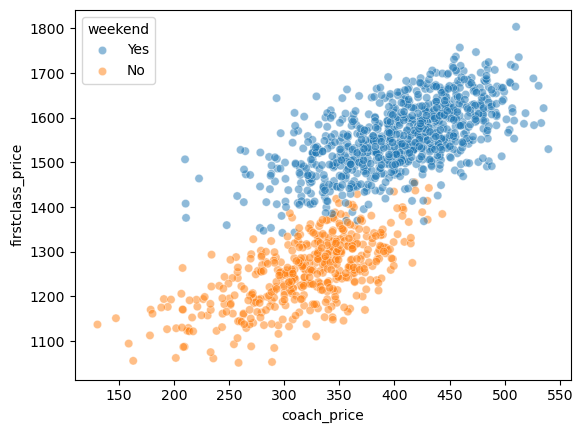

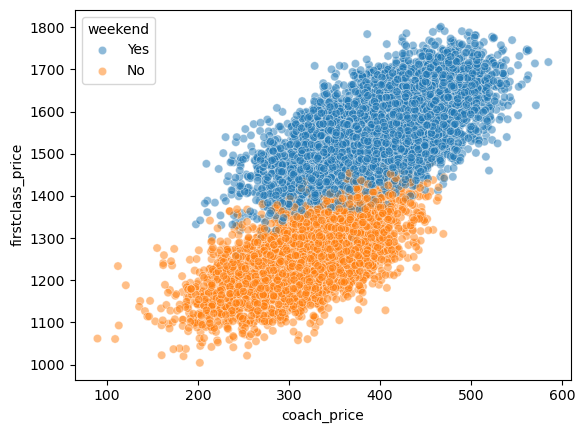

<Figure size 640x480 with 0 Axes>

In [63]:
## Task 7
sns.scatterplot(x=flight_sample.coach_price, y=flight_sample.firstclass_price, hue = flight_sample.weekend, alpha = 0.5)
plt.show()
plt.clf()

sns.scatterplot(x=flight_sample2.coach_price, y=flight_sample2.firstclass_price, hue = flight_sample2.weekend, alpha = 0.5)
plt.show()
plt.clf()
#price tickets are higher on the weekends than weekdays. you can get a better deal on first class on weekdays.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

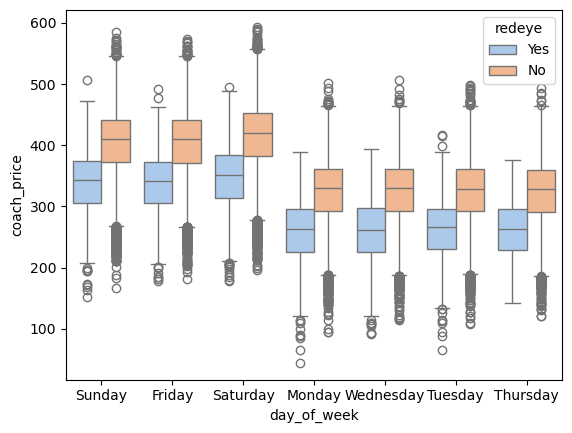

<Figure size 640x480 with 0 Axes>

In [75]:
## Task 8

sns.boxplot(x = 'day_of_week',y = 'coach_price', hue='redeye', palette = 'pastel', data = flight)
plt.show()
plt.clf()

#redeye is cheaper, prices are higher on Sunday, Friday and Saturday.